# Data Preprocessing

## Importing python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns",None)

## Importing data

In [5]:
df=pd.read_csv('employee_eda.csv')

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,0,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,No,34,2,2,4,40,3,4,31,28,1,29
1,18,1,Travel_Rarely,720,Sales,34,2,Technical Degree,1,Female,50,1,1,Research Scientist,3,Single,50885,1221240,2,Yes,18,4,1,3,25,5,3,8,5,4,8
2,25,0,Non-Travel,1406,Support,3,2,Life Sciences,2,Female,198,2,4,Human Resources,2,Divorced,16049,224686,5,Yes,48,1,3,4,13,2,3,5,1,1,3
3,38,1,Travel_Frequently,1316,Software,19,5,Other,4,Male,38,3,2,Manager,3,Single,50758,1268950,3,Yes,12,4,4,3,29,5,4,5,3,1,1
4,35,0,Travel_Rarely,711,Research & Development,28,4,Technical Degree,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Yes,47,4,4,3,1,1,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,19,1,Travel_Rarely,389,Sales,22,1,Human Resources,2,Male,122,1,3,Healthcare Representative,3,Married,30138,241104,0,No,48,3,2,2,12,5,1,8,1,6,2
999996,24,0,Non-Travel,1248,Hardware,7,5,Life Sciences,2,Male,187,3,1,Developer,2,Divorced,39771,1073817,0,No,42,2,4,3,32,2,3,1,1,1,1
999997,55,0,Non-Travel,1298,Support,33,5,Human Resources,1,Female,142,1,3,Sales Executive,3,Single,19790,316640,5,No,26,3,4,1,29,4,4,28,19,16,26
999998,44,1,Non-Travel,1065,Research & Development,34,3,Human Resources,4,Female,102,2,1,Healthcare Representative,3,Married,9736,48680,7,Yes,25,3,3,4,20,2,3,2,2,1,2


In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,0,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,No,34,2,2,4,40,3,4,31,28,1,29
1,18,1,Travel_Rarely,720,Sales,34,2,Technical Degree,1,Female,50,1,1,Research Scientist,3,Single,50885,1221240,2,Yes,18,4,1,3,25,5,3,8,5,4,8
2,25,0,Non-Travel,1406,Support,3,2,Life Sciences,2,Female,198,2,4,Human Resources,2,Divorced,16049,224686,5,Yes,48,1,3,4,13,2,3,5,1,1,3
3,38,1,Travel_Frequently,1316,Software,19,5,Other,4,Male,38,3,2,Manager,3,Single,50758,1268950,3,Yes,12,4,4,3,29,5,4,5,3,1,1
4,35,0,Travel_Rarely,711,Research & Development,28,4,Technical Degree,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Yes,47,4,4,3,1,1,4,1,1,1,1


## Checking For Outliers

In [7]:
l = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany',
     'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PercentSalaryHike']

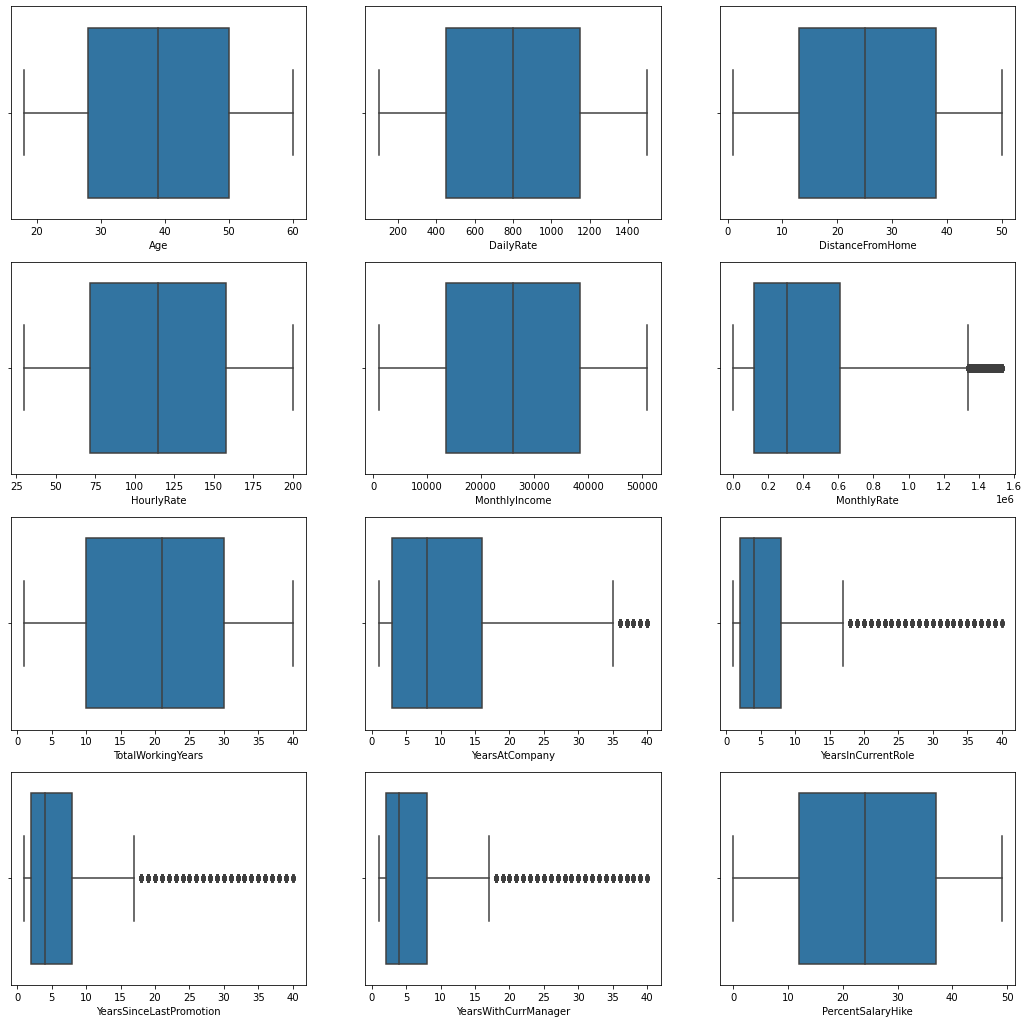

In [8]:
plt.figure(figsize = (18,18))
for i in range(len(l)):
    plt.subplot(4,3, i+1)
    sns.boxplot(data = df, x = df[l[i]])

## Data Cleaning

In [9]:
df[df['YearsAtCompany'] > df['Age']][['Age', 'YearsAtCompany']]

,Age,YearsAtCompany
8,25,27
22,26,29
96,18,19
98,20,27
133,28,30
...,...,...
999867,25,26
999893,18,19
999907,19,28
999952,26,37


Observation: From the above output it can be observed that even though the employee Age is 25 but he works for 27 years at the company,like this there are about 34695 rows present, that shows impossible relation between them,so we can drop them.

In [10]:
df.drop(df[df['YearsAtCompany']>df['Age']].index,inplace = True)
df.shape

(965305, 31)

In [11]:
df[df['TotalWorkingYears'] >=df['Age']][['TotalWorkingYears', 'Age']]

,TotalWorkingYears,Age
1,25,18
10,29,20
14,33,23
17,37,30
38,36,26
...,...,...
999939,29,19
999957,27,27
999965,38,34
999975,29,22


Observation: From the above output we can observe that even though the employee Age is 18, the employee is working for 25 years, like this there are 112539 rows,that shows impossible relation between them, so we can drop them.

In [12]:
df.drop(df[df['TotalWorkingYears'] >= df['Age']].index,inplace = True)
df.shape

(839380, 31)

In [13]:
df[df['TotalWorkingYears'] >= df['Age']][['Age', 'TotalWorkingYears']]

,Age,TotalWorkingYears


In [14]:
df.groupby(["TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","Age"]).size().reset_index().tail(10)

,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Age,0
224838,40,40,39,48,1
224839,40,40,39,54,1
224840,40,40,39,59,1
224841,40,40,39,60,1
224842,40,40,40,43,1
224843,40,40,40,51,1
224844,40,40,40,54,1
224845,40,40,40,57,2
224846,40,40,40,59,1
224847,40,40,40,60,1


Observation: From the above output we can observe that the employee age is 43 but the employee is working for 40 years that means an employee started working since the employee was 3 years old that is impossible.At least a employee age should be 16 to start doing a job,so we can drop them.

In [15]:
df.drop(df[(df['Age']-df['TotalWorkingYears'])<=16].index,inplace = True)

In [16]:
df.groupby(["TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","Age"]).size().reset_index().tail(10)

,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Age,0
113807,40,40,35,59,1
113808,40,40,36,60,1
113809,40,40,37,57,1
113810,40,40,37,60,1
113811,40,40,38,59,1
113812,40,40,39,59,1
113813,40,40,39,60,1
113814,40,40,40,57,2
113815,40,40,40,59,1
113816,40,40,40,60,1


In [17]:
df.shape

(546221, 31)

After dropping all the unimportant data the final shape of our dataset is 546221 rows and 31 columns.

In [18]:
#df.to_csv('new_df.csv')

In [75]:
df1=pd.read_csv('new_df.csv')

In [76]:
df1

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,58,0,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,No,34,2,2,4,40,3,4,31,28,1,29
1,4,35,0,Travel_Rarely,711,Research & Development,28,4,Technical Degree,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Yes,47,4,4,3,1,1,4,1,1,1,1
2,7,37,0,Non-Travel,1077,Human Resources,16,5,Other,3,Female,142,2,3,Manager,2,Single,28591,114364,3,No,22,3,3,2,6,1,1,3,2,3,2
3,9,34,1,Travel_Frequently,1199,Hardware,10,2,Medical,2,Male,197,2,1,Manager,4,Divorced,22968,275616,2,No,2,1,4,1,7,4,3,6,3,5,3
4,11,48,0,Travel_Rarely,184,Human Resources,34,3,Other,3,Male,123,1,3,Human Resources,1,Married,16527,413175,1,Yes,14,2,4,2,17,6,2,11,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,999992,20,0,Travel_Frequently,1472,Research & Development,41,3,Marketing,1,Male,200,3,4,Manager,4,Single,4627,4627,8,No,11,1,1,1,2,4,2,1,1,1,1
546217,999993,60,1,Travel_Frequently,1290,Support,9,5,Marketing,3,Female,176,4,3,Manager,1,Divorced,25823,258230,0,Yes,16,3,1,1,31,3,1,17,12,17,13
546218,999994,51,0,Non-Travel,1265,Hardware,50,3,Other,4,Female,154,2,3,Healthcare Representative,1,Married,12158,218844,0,No,2,3,3,4,15,2,2,12,6,1,10
546219,999997,55,0,Non-Travel,1298,Support,33,5,Human Resources,1,Female,142,1,3,Sales Executive,3,Single,19790,316640,5,No,26,3,4,1,29,4,4,28,19,16,26


In [77]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [78]:
df1.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [79]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,0,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,No,34,2,2,4,40,3,4,31,28,1,29
1,35,0,Travel_Rarely,711,Research & Development,28,4,Technical Degree,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Yes,47,4,4,3,1,1,4,1,1,1,1
2,37,0,Non-Travel,1077,Human Resources,16,5,Other,3,Female,142,2,3,Manager,2,Single,28591,114364,3,No,22,3,3,2,6,1,1,3,2,3,2
3,34,1,Travel_Frequently,1199,Hardware,10,2,Medical,2,Male,197,2,1,Manager,4,Divorced,22968,275616,2,No,2,1,4,1,7,4,3,6,3,5,3
4,48,0,Travel_Rarely,184,Human Resources,34,3,Other,3,Male,123,1,3,Human Resources,1,Married,16527,413175,1,Yes,14,2,4,2,17,6,2,11,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,20,0,Travel_Frequently,1472,Research & Development,41,3,Marketing,1,Male,200,3,4,Manager,4,Single,4627,4627,8,No,11,1,1,1,2,4,2,1,1,1,1
546217,60,1,Travel_Frequently,1290,Support,9,5,Marketing,3,Female,176,4,3,Manager,1,Divorced,25823,258230,0,Yes,16,3,1,1,31,3,1,17,12,17,13
546218,51,0,Non-Travel,1265,Hardware,50,3,Other,4,Female,154,2,3,Healthcare Representative,1,Married,12158,218844,0,No,2,3,3,4,15,2,2,12,6,1,10
546219,55,0,Non-Travel,1298,Support,33,5,Human Resources,1,Female,142,1,3,Sales Executive,3,Single,19790,316640,5,No,26,3,4,1,29,4,4,28,19,16,26


## Feature Selection

Pearson Correlation

<AxesSubplot:>

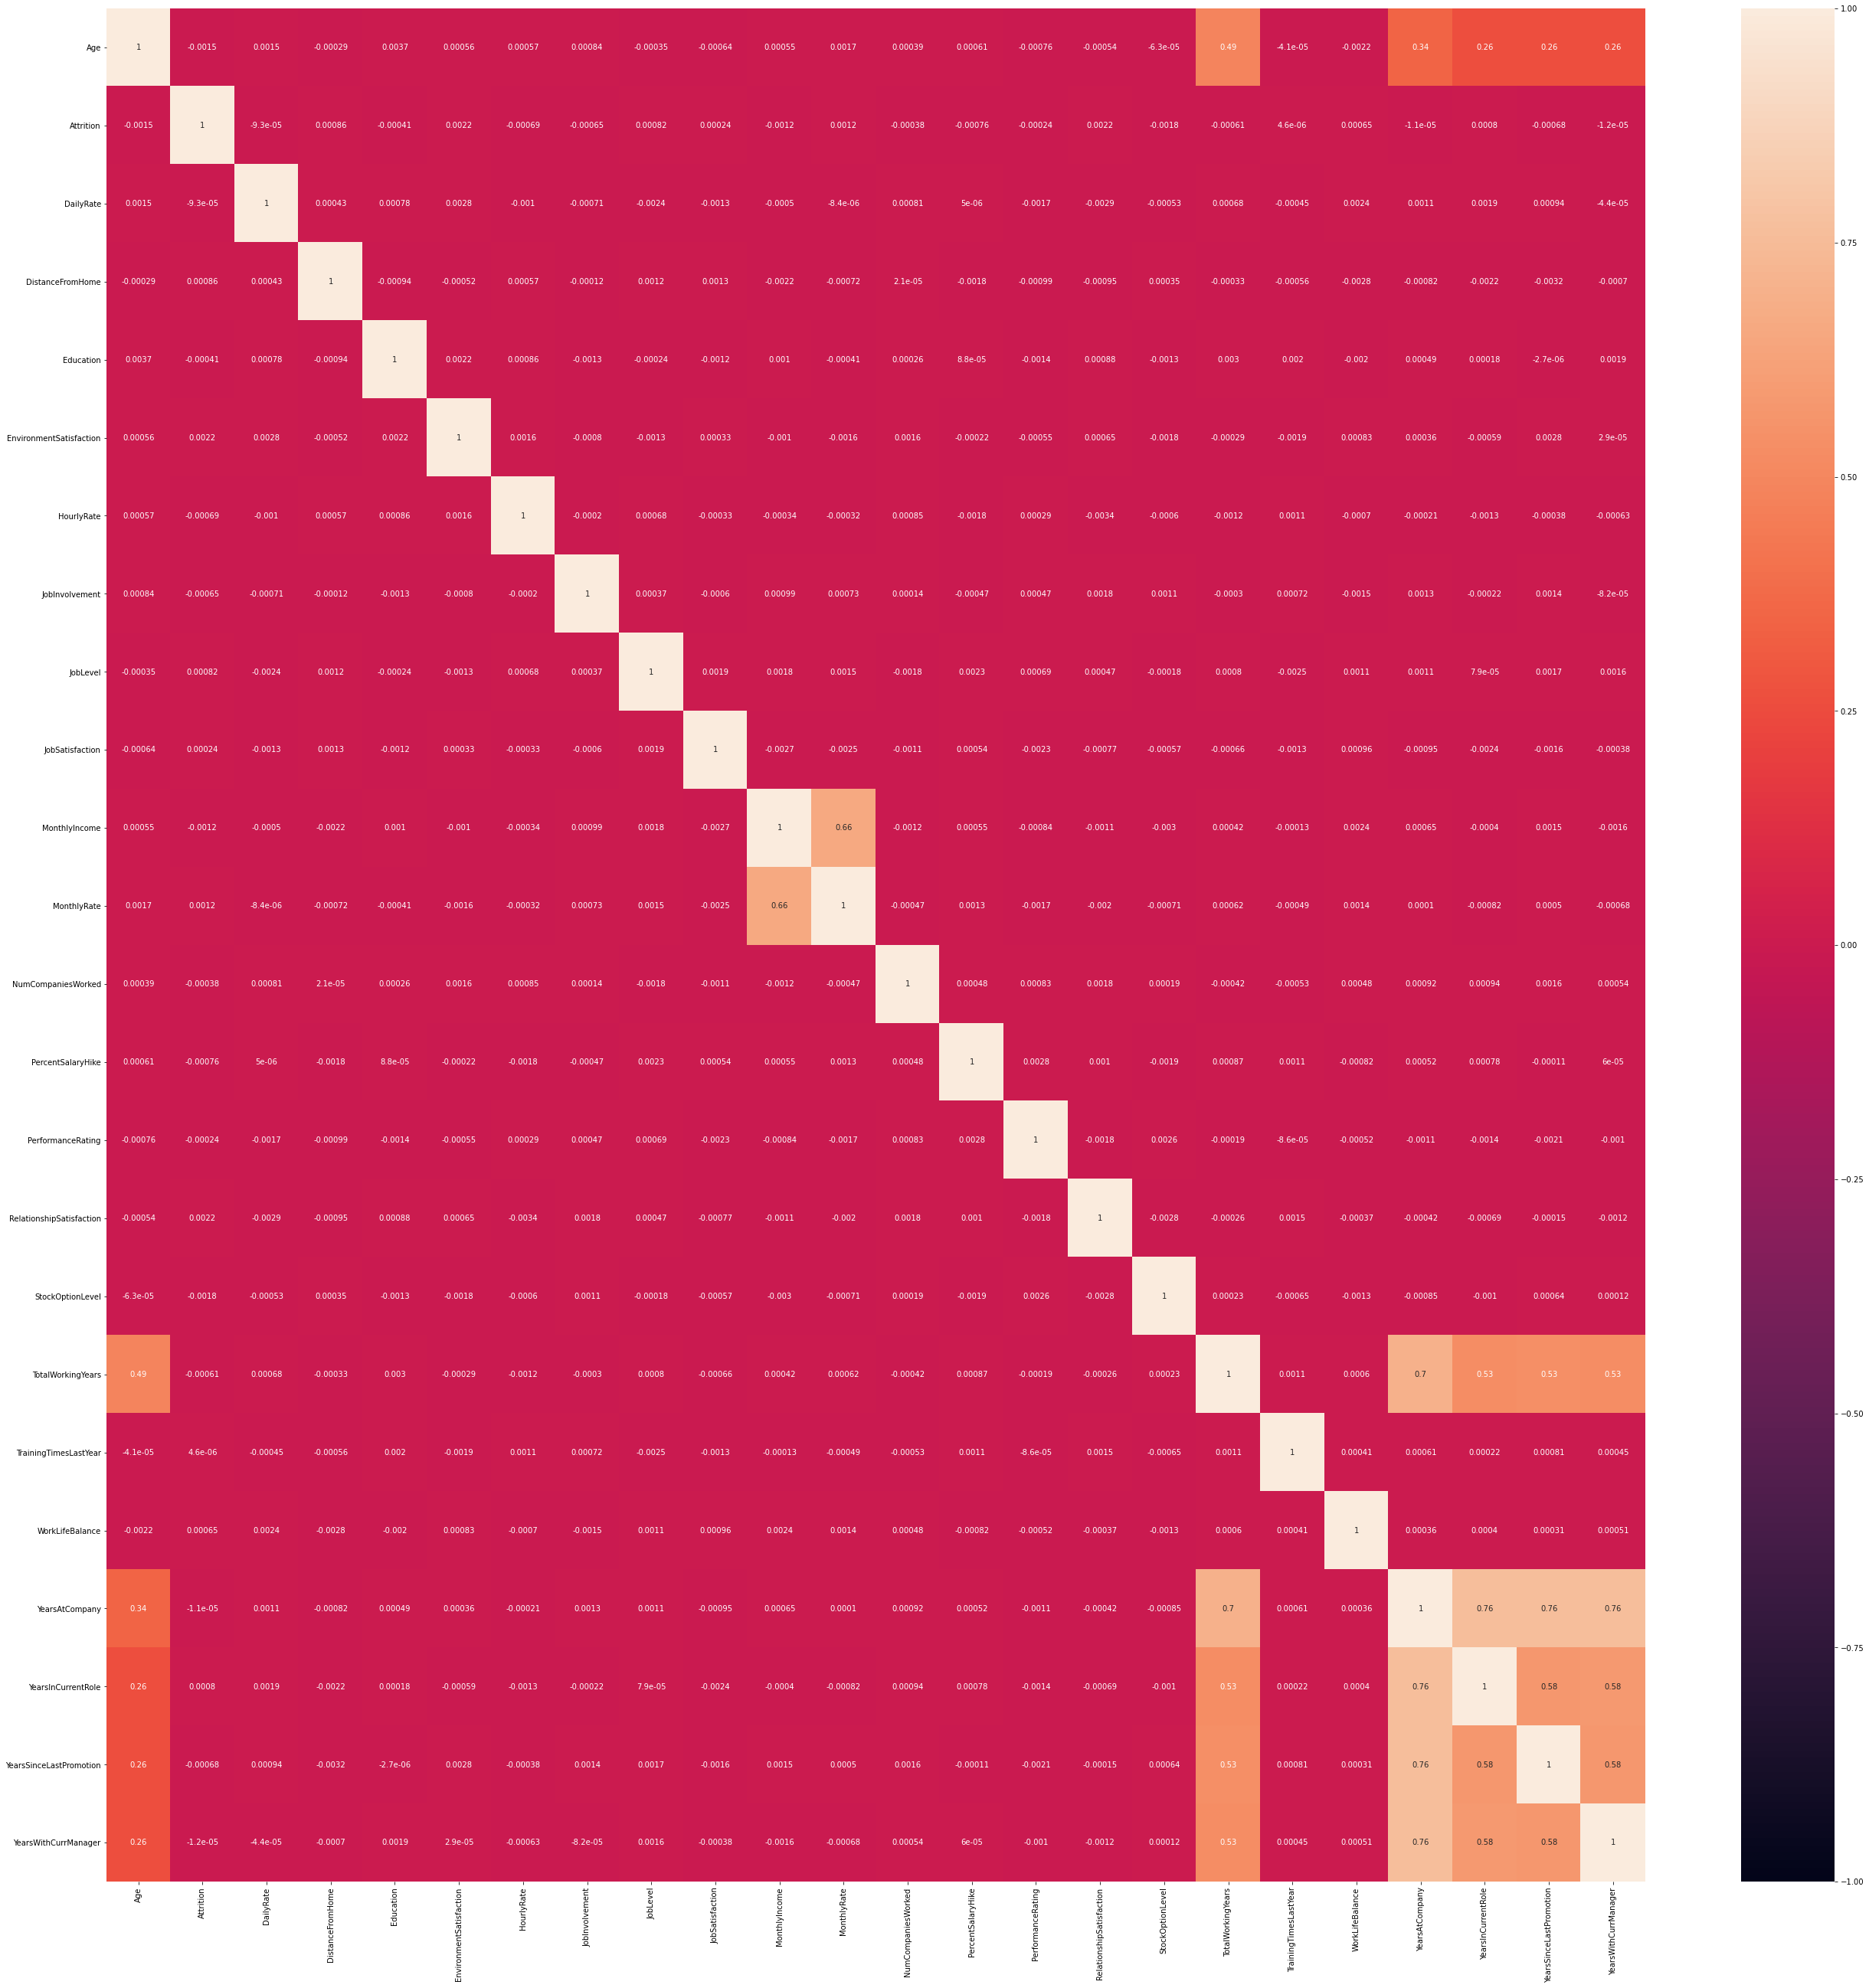

In [32]:
plt.figure(figsize=(45,45))
sns.heatmap(df1.corr(),annot=True,vmin=-1,vmax=1)

In [80]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [81]:
corr_features=correlation(df1,0.55)
len(set(corr_features))

5

In [82]:
corr_features

{'MonthlyRate',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'}

By using "YearsAtCompany" column we will create another feature "Attrition_within_a_year" so that's why we are not dropping that column.In a heatmap we can see that "YearsInCurrentRole" and "YearsSinceLastPromotion" got the correlation value 0.58 so we will drop "YearsInCurrentRole".

In [83]:
df1.drop(['MonthlyRate','YearsInCurrentRole','YearsWithCurrManager'],inplace=True,axis=1)

In [84]:
df1.shape

(546221, 28)

In [16]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,58,0,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,Male,33,4,5,Sales Executive,4,Married,17288,6,No,34,2,2,4,40,3,4,31,1
1,35,0,Travel_Rarely,711,Research & Development,28,4,Technical Degree,3,Male,90,1,5,Research Scientist,1,Single,41000,6,Yes,47,4,4,3,1,1,4,1,1
2,37,0,Non-Travel,1077,Human Resources,16,5,Other,3,Female,142,2,3,Manager,2,Single,28591,3,No,22,3,3,2,6,1,1,3,3
3,34,1,Travel_Frequently,1199,Hardware,10,2,Medical,2,Male,197,2,1,Manager,4,Divorced,22968,2,No,2,1,4,1,7,4,3,6,5
4,48,0,Travel_Rarely,184,Human Resources,34,3,Other,3,Male,123,1,3,Human Resources,1,Married,16527,1,Yes,14,2,4,2,17,6,2,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,20,0,Travel_Frequently,1472,Research & Development,41,3,Marketing,1,Male,200,3,4,Manager,4,Single,4627,8,No,11,1,1,1,2,4,2,1,1
546217,60,1,Travel_Frequently,1290,Support,9,5,Marketing,3,Female,176,4,3,Manager,1,Divorced,25823,0,Yes,16,3,1,1,31,3,1,17,17
546218,51,0,Non-Travel,1265,Hardware,50,3,Other,4,Female,154,2,3,Healthcare Representative,1,Married,12158,0,No,2,3,3,4,15,2,2,12,1
546219,55,0,Non-Travel,1298,Support,33,5,Human Resources,1,Female,142,1,3,Sales Executive,3,Single,19790,5,No,26,3,4,1,29,4,4,28,16


<AxesSubplot:xlabel='OverTime', ylabel='Gender'>

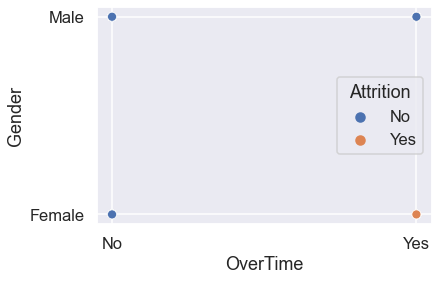

In [62]:
x=df1["OverTime"]
y=df1["Gender"]
sns.scatterplot(x,y,hue="Attrition",data=df1)

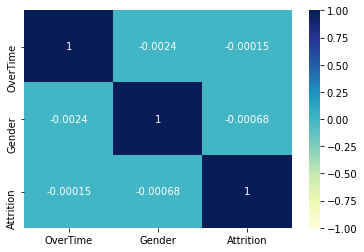

In [85]:
df1['OverTime']=df1['OverTime'].map({'Yes':1,'No':0})
df1['Gender']=df1['Gender'].map({'Male':1,'Female':0})
x=df1[["OverTime","Gender","Attrition"]]
dataplot = sns.heatmap(x.corr(), cmap="YlGnBu", annot=True,vmin =-1,vmax =1)
  
# displaying heatmap
plt.show()

<AxesSubplot:xlabel='JobLevel', ylabel='JobSatisfaction'>

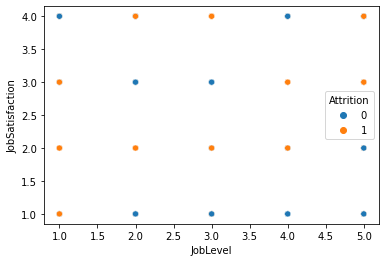

In [131]:
x=df1["JobLevel"]
y=df1["JobSatisfaction"]
sns.scatterplot(x,y,hue="Attrition",data=df1)

In [31]:
#df1.to_csv('evalml.csv',index=False)

In [33]:
df1=pd.get_dummies(df1,drop_first=True)

In [34]:
df1.shape

(546221, 46)

In [35]:
df1

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,20,0,1472,41,3,1,200,3,4,4,4627,8,11,1,1,1,2,4,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
546217,60,1,1290,9,5,3,176,4,3,1,25823,0,16,3,1,1,31,3,1,17,17,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
546218,51,0,1265,50,3,4,154,2,3,1,12158,0,2,3,3,4,15,2,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
546219,55,0,1298,33,5,1,142,1,3,3,19790,5,26,3,4,1,29,4,4,28,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [34]:
#df.to_csv('model_df.csv')

In [35]:
#df_att_year.to_csv('model2.csv')

In [22]:
df2=pd.read_csv("model2.csv")

In [23]:
df2

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,546216,20,0,1472,41,3,1,200,3,4,4,4627,8,11,1,1,1,2,4,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
546217,546217,60,1,1290,9,5,3,176,4,3,1,25823,0,16,3,1,1,31,3,1,17,17,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
546218,546218,51,0,1265,50,3,4,154,2,3,1,12158,0,2,3,3,4,15,2,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
546219,546219,55,0,1298,33,5,1,142,1,3,3,19790,5,26,3,4,1,29,4,4,28,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [24]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

In [25]:
df2

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,20,0,1472,41,3,1,200,3,4,4,4627,8,11,1,1,1,2,4,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
546217,60,1,1290,9,5,3,176,4,3,1,25823,0,16,3,1,1,31,3,1,17,17,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
546218,51,0,1265,50,3,4,154,2,3,1,12158,0,2,3,3,4,15,2,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
546219,55,0,1298,33,5,1,142,1,3,3,19790,5,26,3,4,1,29,4,4,28,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Feature Scalling

### Normalization using Min-Max Scaling 

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
b=MinMaxScaler()

In [42]:
for i in df2.columns:
    df2[i]=b.fit_transform(df2[[i]])

In [43]:
df2

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.952381,0.0,0.071429,0.244898,1.00,0.000000,0.017647,1.000000,1.00,1.000000,0.325767,0.750,0.693878,0.333333,0.333333,1.000000,1.000000,0.4,1.000000,0.769231,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.404762,0.0,0.436429,0.551020,0.75,0.666667,0.352941,0.000000,1.00,0.000000,0.800016,0.750,0.959184,1.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.452381,0.0,0.697857,0.306122,1.00,0.666667,0.658824,0.333333,0.50,0.333333,0.551831,0.375,0.448980,0.666667,0.666667,0.333333,0.128205,0.0,0.000000,0.051282,0.051282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.380952,1.0,0.785000,0.183673,0.25,0.333333,0.982353,0.333333,0.00,1.000000,0.439369,0.250,0.040816,0.000000,1.000000,0.000000,0.153846,0.6,0.666667,0.128205,0.102564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.714286,0.0,0.060000,0.673469,0.50,0.666667,0.547059,0.000000,0.50,0.000000,0.310546,0.125,0.285714,0.333333,1.000000,0.333333,0.410256,1.0,0.333333,0.256410,0.128205,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.047619,0.0,0.980000,0.816327,0.50,0.000000,1.000000,0.666667,0.75,1.000000,0.072541,1.000,0.224490,0.000000,0.000000,0.000000,0.025641,0.6,0.333333,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
546217,1.000000,1.0,0.850000,0.163265,1.00,0.666667,0.858824,1.000000,0.50,0.000000,0.496470,0.000,0.326531,0.666667,0.000000,0.000000,0.769231,0.4,0.000000,0.410256,0.410256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546218,0.785714,0.0,0.832143,1.000000,0.50,1.000000,0.729412,0.333333,0.50,0.000000,0.223164,0.000,0.040816,0.666667,0.666667,1.000000,0.358974,0.2,0.333333,0.282051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546219,0.880952,0.0,0.855714,0.653061,1.00,0.000000,0.658824,0.000000,0.50,0.666667,0.375808,0.625,0.530612,0.666667,1.000000,0.000000,0.717949,0.6,1.000000,0.692308,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [44]:
df2.dtypes

Age                                  float64
Attrition                            float64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
NumCompaniesWorked                   float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
YearsSinceLastPromotion              float64
BusinessTravel_Travel_Frequently     float64
BusinessTr

In [45]:
#df2.to_csv('emp_normalized.csv',index=False)

In [4]:
df3=pd.read_csv("emp_normalized.csv")

In [5]:
df3

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.952381,0.0,0.071429,0.244898,1.00,0.000000,0.017647,1.000000,1.00,1.000000,0.325767,0.750,0.693878,0.333333,0.333333,1.000000,1.000000,0.4,1.000000,0.769231,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.404762,0.0,0.436429,0.551020,0.75,0.666667,0.352941,0.000000,1.00,0.000000,0.800016,0.750,0.959184,1.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.452381,0.0,0.697857,0.306122,1.00,0.666667,0.658824,0.333333,0.50,0.333333,0.551831,0.375,0.448980,0.666667,0.666667,0.333333,0.128205,0.0,0.000000,0.051282,0.051282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.380952,1.0,0.785000,0.183673,0.25,0.333333,0.982353,0.333333,0.00,1.000000,0.439369,0.250,0.040816,0.000000,1.000000,0.000000,0.153846,0.6,0.666667,0.128205,0.102564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.714286,0.0,0.060000,0.673469,0.50,0.666667,0.547059,0.000000,0.50,0.000000,0.310546,0.125,0.285714,0.333333,1.000000,0.333333,0.410256,1.0,0.333333,0.256410,0.128205,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.047619,0.0,0.980000,0.816327,0.50,0.000000,1.000000,0.666667,0.75,1.000000,0.072541,1.000,0.224490,0.000000,0.000000,0.000000,0.025641,0.6,0.333333,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
546217,1.000000,1.0,0.850000,0.163265,1.00,0.666667,0.858824,1.000000,0.50,0.000000,0.496470,0.000,0.326531,0.666667,0.000000,0.000000,0.769231,0.4,0.000000,0.410256,0.410256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546218,0.785714,0.0,0.832143,1.000000,0.50,1.000000,0.729412,0.333333,0.50,0.000000,0.223164,0.000,0.040816,0.666667,0.666667,1.000000,0.358974,0.2,0.333333,0.282051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546219,0.880952,0.0,0.855714,0.653061,1.00,0.000000,0.658824,0.000000,0.50,0.666667,0.375808,0.625,0.530612,0.666667,1.000000,0.000000,0.717949,0.6,1.000000,0.692308,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
df3.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsSinceLastPromotion              0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales         

In [7]:
df3["Attrition"].value_counts()

0.0    273189
1.0    273032
Name: Attrition, dtype: int64

In [40]:
%%time

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)

Wall time: 9min 7s


In [43]:
print("Training Accuracy:",lgbm.score(x_train,y_train))
print("--------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,y_pred))
print("-------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,y_pred))
print("-------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,y_pred))

Training Accuracy: 0.852671542601882
--------------------------------------------------------
Testin Accuracy: 0.6868140418325781
-------------------------------------------------------------
confusion_matrix:
 [[37486 17116]
 [17098 37545]]
-------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69     54602
           1       0.69      0.69      0.69     54643

    accuracy                           0.69    109245
   macro avg       0.69      0.69      0.69    109245
weighted avg       0.69      0.69      0.69    109245

